In [11]:
import spock
import random
import numpy as np
import rebound
import pandas as pd
from spock import simsetup
from spock import FeatureClassifier
import matplotlib.pyplot as plt

resTestThetaAlt  tests the min func

resTestTheta normal
res1e4Theta

resThetaData

In [12]:
ResDatapath = '../../cleanData/csvs/resonant/'
RandDatapath = '../../cleanData/csvs/random/'

#data = pd.read_csv(ResDatapath+'07-02-25-thetaSTD.csv')
#data = pd.read_csv(ResDatapath+'07-02-25-thetaSTD.csv')
#data = pd.read_csv(ResDatapath+'23-02-25-thetaSTD.csv')
data = pd.read_csv(ResDatapath+'02-03-25-thetaSTD.csv')



#rand = pd.read_csv(RandDatapath+'rand1e4Theta.csv')

In [13]:
#data = pd.concat([res, rand], axis=0)

In [14]:
data.columns

Index(['Unnamed: 0.1', 'EMcrossnear', 'EMfracstdnear', 'EPstdnear',
       'MMRstrengthnear', 'EMcrossfar', 'EMfracstdfar', 'EPstdfar',
       'MMRstrengthfar', 'threeBRfillfac', 'threeBRfillstd', 'MEGNO',
       'MEGNOstd', 'ThetaSTD12', 'ThetaSTD23', 'ThetaSTD12alt',
       'ThetaSTD23alt', 'Tsec', 'near', 'nearThetaSTD', 'nearThetaSTDalt',
       'eta', 'nu', 'InitialStable', 'Unnamed: 0', 'runstring',
       'instability_time', 'shadow_instability_time', 'Stable'],
      dtype='object')

In [15]:
def plotfill(x):
    p1 = np.log10((x**(-1.5))*(1/(1-(x**(-1)))))
    p2 = np.sqrt(-np.log(1-(x**(-1))))
    return p1+p2
fillList =np.linspace(1.0001,20,100000)
y = list(map(plotfill,fillList))
y = list(map(lambda x: 10**((x)+5.5), y))


In [16]:
import matplotlib as mpl

In [17]:
data

,Unnamed: 0.1,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,EMcrossfar,EMfracstdfar,EPstdfar,MMRstrengthfar,threeBRfillfac,...,nearThetaSTD,nearThetaSTDalt,eta,nu,InitialStable,Unnamed: 0,runstring,instability_time,shadow_instability_time,Stable
0,0,0.060234,0.029447,0.001995,0.495659,0.504063,0.002900,0.000816,NaN,1.917395,...,0.176236,3.008104,0.090167,0.076149,True,0,0000000.bin,1.545872e+06,3.063700e+06,False
1,1,0.080547,0.016559,0.000112,0.447418,0.240504,0.006736,0.001621,0.008590,0.407998,...,0.506031,2.700674,0.223778,0.085428,True,1,0000001.bin,9.990000e+08,9.990000e+08,True
2,2,0.129660,0.028844,0.003181,1.003280,1.001981,0.001402,0.003742,0.010416,0.418203,...,1.817621,1.810118,0.763257,0.153145,True,2,0000002.bin,9.990000e+08,9.990000e+08,True
3,3,0.406112,0.036478,0.002390,0.321576,0.427768,0.036219,0.008587,0.012953,0.122730,...,1.725890,1.881519,0.382465,0.255447,True,3,0000003.bin,2.287671e+06,8.392234e+06,False
4,4,0.059897,0.028009,0.001623,0.369199,0.257596,0.053197,0.001287,0.034953,2.369149,...,1.786143,1.968942,0.761511,0.069436,True,4,0000004.bin,9.668931e+05,3.380350e+05,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102492,102492,0.089252,0.285074,0.013469,0.050147,0.310694,0.037646,0.001068,0.415810,NaN,...,1.918205,1.710936,0.180873,0.093354,False,102492,9044761.bin,6.303165e+04,6.470086e+04,False
102493,102493,0.082222,0.039388,0.006138,0.651070,0.664222,0.031006,0.001013,NaN,3.802285,...,0.140460,3.017713,0.088733,0.101762,True,102493,9045377.bin,6.990387e+05,8.267916e+05,False
102494,102494,0.131799,0.022057,0.000146,0.836132,0.366664,0.060791,0.016575,0.005469,0.543637,...,1.892131,1.616614,0.651021,0.130883,True,102494,9045380.bin,1.193822e+07,3.363291e+07,False
102495,102495,0.209454,0.036889,0.005252,1.469809,0.395073,0.102246,0.022792,0.029169,0.118894,...,1.792870,1.846880,0.538401,0.181163,True,102495,9045382.bin,2.064407e+08,4.316851e+07,False


In [18]:
# fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
# vmi = 0.5
# vma = 1.75
# tag1 = 'ThetaSTD12'
# tag2 = 'ThetaSTD23'
# ax[0].scatter((data['threeBRfillfac']),(data['instability_time']), 
#            s=2, c=((data[tag1])), cmap="cool",
#            vmin=vmi,vmax=vma,alpha=.8)
# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
#              ax=ax, orientation='vertical', label='ThetaSTD')

# # cbar = fig.colorbar(orientation="vertical", extend="both",
# #                     pad=0.05, shrink=1, aspect=20, format="%.3f")

# ax[0].scatter(fillList, y,s=4, c = 'red')
# ax[0].set_xlim([0,20])
# ax[0].set_ylim([1e4,2e9])
# ax[0].set_xlabel(" 3BR fill facture")
# ax[0].set_ylabel("log instability time")
# ax[0].set_yscale('log')
# #cbar.set_label('close body conjunction angle std')
# ax[0].set_facecolor("black")
# ax[0].set_title('std of conjunction angle for inner planet pair')


# ax[1].scatter((data['threeBRfillfac']),(data['instability_time']), 
#            s=2, c=((data[tag2])), cmap="cool",
#            vmin=vmi,vmax=vma,alpha=.8)

# ax[1].scatter(fillList, y,s=4, c = 'red')
# ax[1].set_xlim([0,20])
# ax[1].set_xlabel(" 3BR fill facture")
# ax[1].set_ylabel("log instability time")
# ax[1].set_title('std of conjunction angle for outer planet pair')

# #cbar.set_label('close body conjunction angle std')
# ax[1].set_facecolor("black")

In [19]:
data[['ThetaSTD12','ThetaSTD23','nearThetaSTD']].describe()

,ThetaSTD12,ThetaSTD23,nearThetaSTD
count,102497.000000,102497.000000,102497.000000
mean,1.381532,1.405822,1.405822
std,0.639090,0.623811,0.623811
min,0.004862,0.003875,0.003875
25%,0.887443,0.993977,0.993977
50%,1.733832,1.741690,1.741690
75%,1.826694,1.827202,1.827202
max,2.939410,2.989579,2.989579


In [20]:
data['threeBRfillfac'] = pd.to_numeric(data['threeBRfillfac'], errors='coerce')
data = data.dropna()

In [21]:
data['threeBRfillfac'].describe([0.01, 0.2])

count    76400.000000
mean         1.022925
std          2.728636
min          0.002420
1%           0.016170
20%          0.123190
50%          0.413749
max        335.260781
Name: threeBRfillfac, dtype: float64

In [22]:
data['near'].describe()

count      76400
unique         2
top       [1, 2]
freq       38478
Name: near, dtype: object

In [23]:
temp = data[(data['EMcrossnear'] < 0.03)]
#0.024529	
#temp = temp.drop(78542)
# temp = temp.drop(31819)
# temp = temp.drop(26394)
temp12 = temp[(temp['near'] == '[1, 2]'	)]
temp23 = temp[(temp['near'] == '[2, 3]'	)]


In [24]:
temp['Stable'].sum()

32

In [25]:
temp12[['threeBRfillfac']].describe()

,threeBRfillfac
count,913.000000
mean,2.530506
std,3.569397
min,0.188360
25%,0.987809
50%,1.517685
75%,2.725575
max,59.477000


In [26]:
temp23[['threeBRfillfac']].describe()


,threeBRfillfac
count,939.000000
mean,10.464351
std,11.191439
min,0.580640
25%,4.223819
50%,7.043319
75%,13.368764
max,132.925751


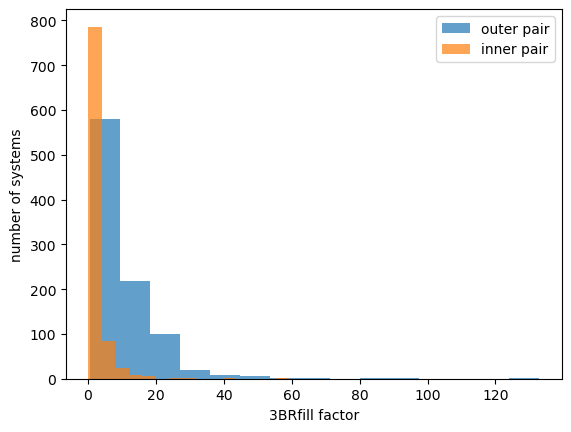

In [27]:
fig, ax = plt.subplots()
ax.hist(temp23['threeBRfillfac'], label='outer pair', alpha=0.7, bins=15)
ax.hist(temp12['threeBRfillfac'], label='inner pair', alpha=0.7, bins=15)

ax.set_ylabel('number of systems')
ax.set_xlabel('3BRfill factor')
ax.legend()

In [28]:
temp23

,Unnamed: 0.1,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,EMcrossfar,EMfracstdfar,EPstdfar,MMRstrengthfar,threeBRfillfac,...,nearThetaSTD,nearThetaSTDalt,eta,nu,InitialStable,Unnamed: 0,runstring,instability_time,shadow_instability_time,Stable
65,65,0.029429,0.032726,0.001167,0.017726,0.563339,0.001407,0.000028,0.054220,14.975743,...,1.826229,1.836477,0.042761,0.040825,True,65,0000065.bin,1.456195e+05,9.289723e+04,False
221,221,0.024261,0.169684,0.000108,0.087318,0.098938,0.039099,0.001253,0.003998,4.938716,...,1.553628,1.985555,0.257568,0.036043,True,221,0000221.bin,1.232794e+04,1.257652e+04,False
246,246,0.022007,0.209062,0.000863,0.118535,0.031523,0.076463,0.000486,0.071987,24.059802,...,1.805266,1.775015,0.398989,0.018745,True,246,0000246.bin,2.655102e+04,2.055425e+03,False
309,309,0.020804,0.258137,0.000038,0.069182,0.123763,0.050991,0.001072,0.004863,6.607020,...,1.883278,1.684331,0.142662,0.027109,True,309,0000309.bin,1.922885e+05,8.587612e+03,False
314,314,0.028744,0.037887,0.000334,0.101542,0.530839,0.002366,0.000006,0.011580,12.774553,...,0.331099,2.884594,0.044524,0.039815,True,314,0000314.bin,1.110313e+06,1.866256e+06,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101946,101946,0.021519,0.236367,0.000066,0.064257,0.159500,0.023834,0.001304,0.012844,5.147209,...,1.832963,1.767488,0.140903,0.034095,True,101946,8825377.bin,3.455871e+04,1.997515e+04,False
102243,102243,0.028127,0.199079,0.000564,0.059133,0.183043,0.024714,0.000266,0.011228,10.201872,...,1.766751,1.842200,0.135331,0.038419,True,102243,8936634.bin,3.094988e+04,7.325238e+04,False
102298,102298,0.026830,0.352470,0.001449,0.057072,0.579793,0.005750,0.000040,0.096665,7.836550,...,1.770680,1.856305,0.083085,0.079522,True,102298,8945379.bin,1.022202e+07,9.329484e+03,False
102351,102351,0.023716,0.049648,0.000058,0.023257,0.223328,0.006789,0.000070,0.005223,5.995003,...,1.842658,1.777307,0.094197,0.033121,True,102351,9029142.bin,6.626071e+04,1.026777e+06,False


In [29]:
temp23['threeBRfillfac'].argmax()

309

In [30]:
temp23.iloc[154]

Unnamed: 0.1                       15380
EMcrossnear                     0.021553
EMfracstdnear                   0.283257
EPstdnear                       0.000359
MMRstrengthnear                 0.077243
EMcrossfar                      0.052366
EMfracstdfar                    0.028182
EPstdfar                        0.001938
MMRstrengthfar                  0.024134
threeBRfillfac                 10.974927
threeBRfillstd                  3.578632
MEGNO                          78.631045
MEGNOstd                       21.872566
ThetaSTD12                      1.830331
ThetaSTD23                      1.652047
ThetaSTD12alt                   1.853218
ThetaSTD23alt                   1.916181
Tsec                         5424.888775
near                              [2, 3]
nearThetaSTD                    1.652047
nearThetaSTDalt                 1.916181
eta                             0.344527
nu                              0.025994
InitialStable                       True
Unnamed: 0      

In [31]:
temp['near'].describe()

count       1852
unique         2
top       [2, 3]
freq         939
Name: near, dtype: object

In [32]:
temp[['EMcrossnear','threeBRfillfac', 'nearThetaSTD']].describe()

,EMcrossnear,threeBRfillfac,nearThetaSTD
count,1852.000000,1852.000000,1852.000000
mean,0.025365,6.553120,1.662328
std,0.003399,9.246038,0.418085
min,0.012845,0.188360,0.035351
25%,0.023263,1.495579,1.703163
50%,0.026036,3.492141,1.790273
75%,0.028195,7.967633,1.846632
max,0.029991,132.925751,2.440784


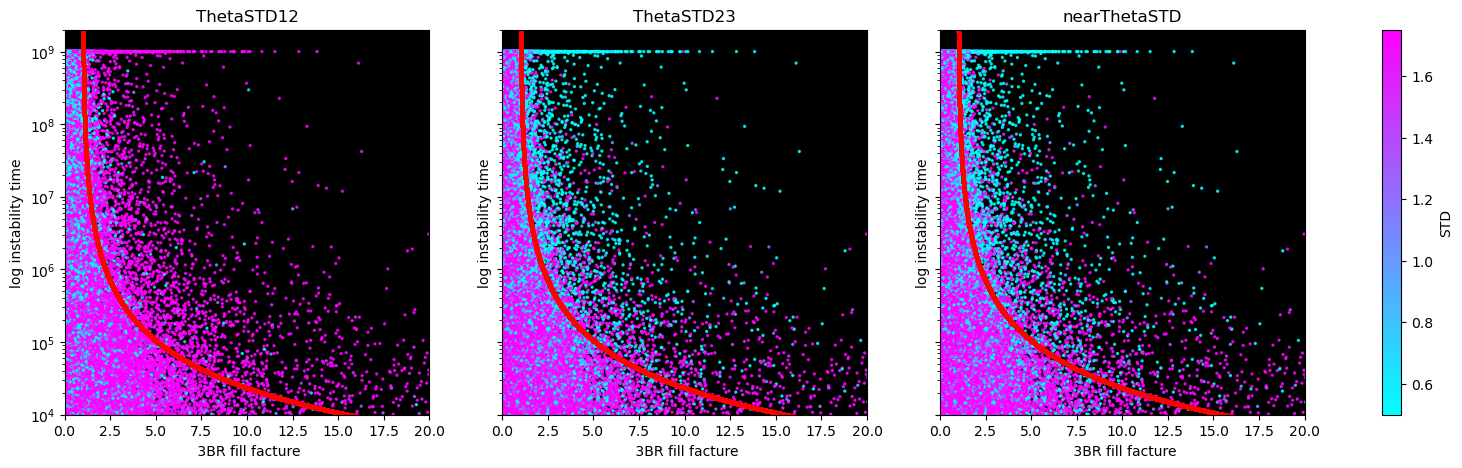

In [33]:
#ax = plt.axes()
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
vmi = 0.5
vma = 1.75

tags =[ 'ThetaSTD12', 'ThetaSTD23','nearThetaSTD']

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
             ax=ax, orientation='vertical', label='STD')
for i, e in enumerate(tags):
    ax[i].scatter((data['threeBRfillfac']),(data['instability_time']), 
           s=2, c=((data[e])), cmap="cool",
           vmin=vmi,vmax=vma,alpha=.8)
    ax[i].scatter(fillList, y,s=4, c = 'red')
    ax[i].set_xlim([0,20])
    ax[i].set_ylim([1e4,2e9])
    ax[i].set_xlabel(" 3BR fill facture")
    ax[i].set_ylabel("log instability time")
    ax[i].set_yscale('log')
    #cbar.set_label('close body conjunction angle std')
    ax[i].set_facecolor("black")
    ax[i].set_title(e)




In [34]:
histNear = data[(data['threeBRfillfac'] < 25) & (data['near'] == '[1, 2]')]
histFar = data[(data['threeBRfillfac'] < 25) & (data['near'] == '[2, 3]')]



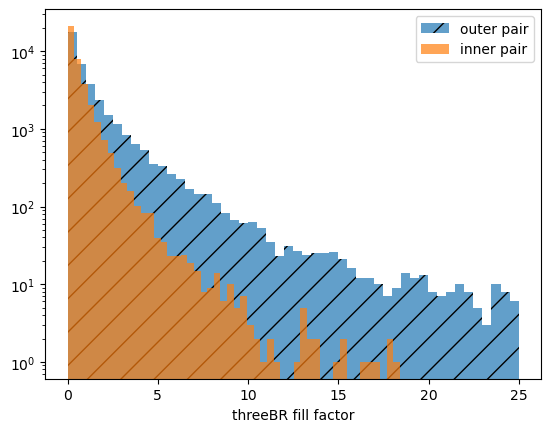

In [35]:
fig, ax = plt.subplots()
ax.hist(histFar['threeBRfillfac'], label='outer pair', alpha=0.7, bins=50, hatch='/')
ax.hist(histNear['threeBRfillfac'], label='inner pair', alpha=0.7, bins=50)
ax.set_yscale('log')
ax.set_xlabel('threeBR fill factor')
ax.legend()


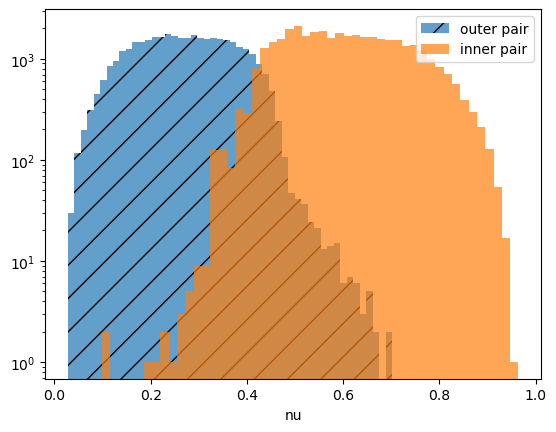

In [38]:
fig, ax = plt.subplots()
ax.hist(histFar['eta'], label='outer pair', alpha=0.7, bins=50, hatch='/')
ax.hist(histNear['eta'], label='inner pair', alpha=0.7, bins=50)
ax.set_yscale('log')
ax.set_xlabel('nu')
ax.legend()

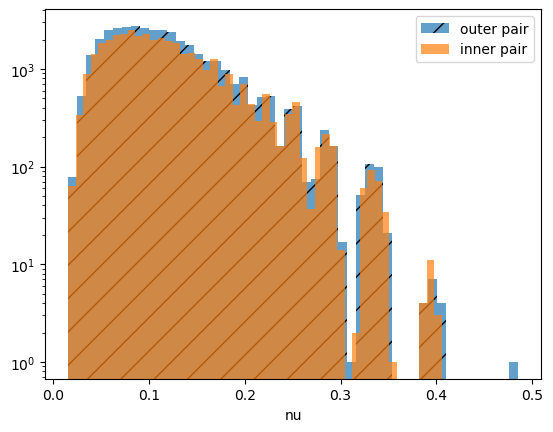

In [39]:
fig, ax = plt.subplots()
ax.hist(histFar['nu'], label='outer pair', alpha=0.7, bins=50, hatch='/')
ax.hist(histNear['nu'], label='inner pair', alpha=0.7, bins=50)
ax.set_yscale('log')
ax.set_xlabel('nu')
ax.legend()

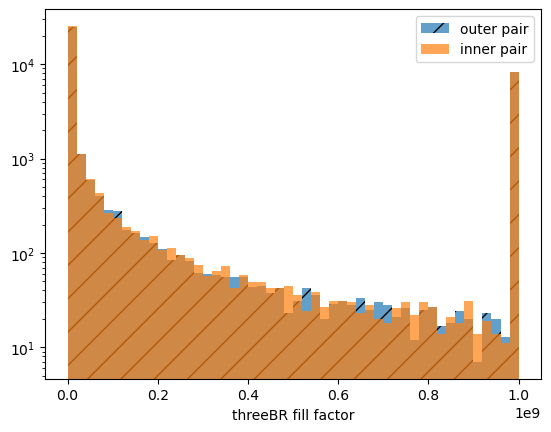

In [36]:
fig, ax = plt.subplots()
ax.hist(histFar['instability_time'], label='outer pair', alpha=0.7, bins=50, hatch='/')
ax.hist(histNear['instability_time'], label='inner pair', alpha=0.7, bins=50)
ax.set_yscale('log')
ax.set_xlabel('threeBR fill factor')
ax.legend()


In [27]:
specific = data[(data['threeBRfillfac'] > 2.5) & (data['instability_time']>9e8)]

In [28]:
specific['near'].describe()

count        272
unique         2
top       [2, 3]
freq         271
Name: near, dtype: object

In [20]:
sim = rebound.Simulation(ResDatapath+"clean_initial_conditions.bin", snapshot=7933)

In [21]:
def threeBRFillFac(sim, trio):
    '''calculates the 3BR filling factor in acordance to petit20'''
    ps = sim.particles
    b0, b1,b2,b3 = ps[0], ps[trio[0]], ps[trio[1]], ps[trio[2]]
    m0,m1,m2,m3 = b0.m,b1.m,b2.m,b3.m
    ptot = None

    #semim
    a12 =(b1.a/b2.a)
    a23 = (b2.a/b3.a)

    #equation 43
    d12 = 1- a12
    d23 = 1- a23

    #equation 45
    d = (d12*d23)/(d12+d23)

    #equation 19
    mu12 = b1.P/b2.P
    mu23 = b2.P/b3.P

    #equation 21
    eta = (mu12*(1-mu23))/(1-(mu12*mu23))

    #equation 53
    eMpow2 = (m1*m3 + m2*m3*(eta**2)*(a12**(-2))+m1*m2*(a23**2)*((1-eta)**2))/(m0**2)

    #equation 59
    dov = ((42.9025)*(eMpow2)*(eta*((1-eta)**3)))**(0.125)


    #equation 60

    ptot = (dov/d)**4

    return abs(ptot)

In [22]:
import spock.simsetup


spock.simsetup.init_sim_parameters(sim)

In [30]:
sim.integrate(12961.211935)

In [31]:
threeBRFillFac(sim,[1,2,3])

9.956404232959862

In [24]:
from spock import features

In [29]:
features.threeBRFillFac(sim,[1,2,3])

10.194035623972265

/home/ethadhani/summerSPOCK/datafilt/graphThetaSTD.ipynb

maybe try mod pi and see if that fixed the issue

In [27]:
specific = data[(data['threeBRfillfac'] > 15) & (data['instability_time']>9e8)]

In [12]:
specific['Unnamed: 0.1']

27216    27216
37919    37919
43946    43946
54691    54691
64067    64067
65167    65167
96975    96975
Name: Unnamed: 0.1, dtype: int64


In [ ]:
27216
37919
43946
54691
64067
65167
96975

In [28]:
ps = sim.particles

Nu12 = ps[1].P/ps[2].P
Nu23 = ps[2].P/ps[3].P
masses = [ps[1].m,ps[2].m,ps[3].m]

Eta = Nu12*(1-Nu23)/(1-Nu12*Nu23)
Nu = 1/(1/(1/Nu12-1)+1/(1-Nu23))

In [29]:
def nu_eta_to_nus(nu,eta):
    return eta/(eta+nu),(1-eta-nu)/(1-eta)

In [30]:
def _fillingfactor_th(nu,eta,masses,m0=1.):
    "Auxiliary function to compute theoretical overlap limit"
    m1,m2,m3 = masses
    nu12,nu23 = nu_eta_to_nus(nu,eta)
    plsep = 1/(1/(1-nu12**(2/3))+1/(1-nu23**(2/3)))
    Mfac = (m1*m3/m0**2*(eta**2/nu12**(4/3)+1+(1-eta)**2*nu23**(4/3)))**.5

    return np.nan_to_num(Mfac*(38/np.pi)**.5*4*2**.5/3*(eta*(1-eta))**1.5/plsep**4-1)

In [32]:
from scipy.optimize import fsolve

In [33]:
def nu_overlaplimit(etas,masses,m0=1.):
    nuguess = 0.05*np.ones_like(etas)
    nuov = fsolve(_fillingfactor_th,nuguess,args=(etas,masses,m0))
    return nuov

In [ ]:
nu_overlaplimit(etas,masses,m0=1.)

In [31]:
_fillingfactor_th(Nu, Eta, masses)

0.3729319482290152